<a href="https://colab.research.google.com/github/Ash100/Documents/blob/main/upset_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib-venn

In [2]:
# Install/Upgrade libraries
!pip install --upgrade upsetplot matplotlib pandas seaborn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 131.9 MB/s eta 0:00:00
  Created wheel for upsetplot: filename=upsetplot-0.9.0-py3-none-any.whl size=24866 sha256=2fcaecef303856deb2b730a8ac066eb449a52ae058893afd8470a72b27677d73
  Stored in directory: /root/.cache/pip/wheels/7b/ce/88/1d0bce5b2680165c29c3e68416325e79674d5a9f422d037996
Successfully built upsetplot
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's 

/usr/local/lib/python3.11/dist-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/usr/local/lib/python3.11/dist-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/usr/local/lib/

<Figure size 2500x1200 with 0 Axes>

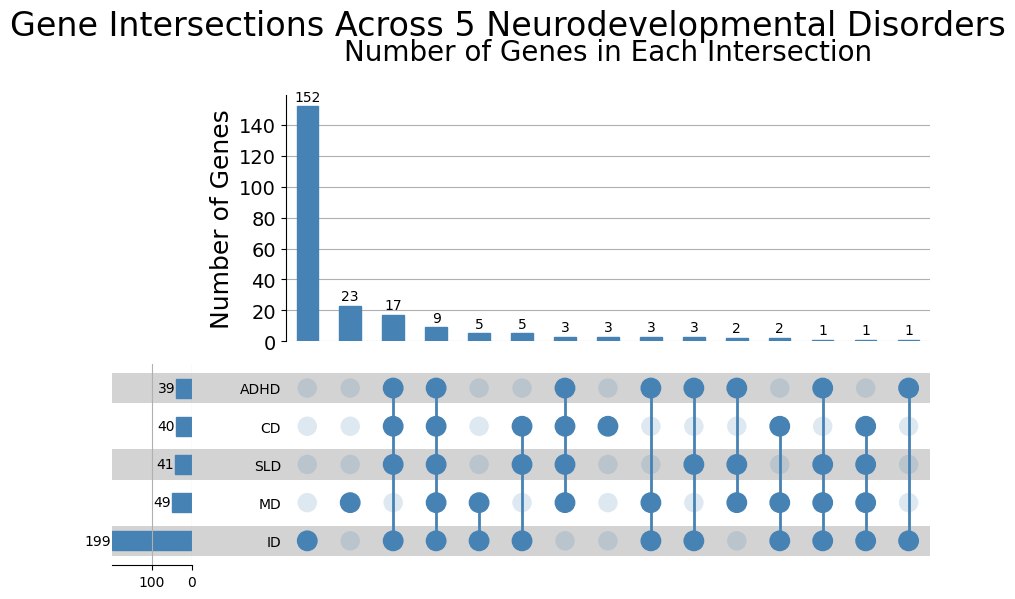

In [2]:
# 2. Import necessary libraries
from upsetplot import plot, from_contents
import pandas as pd
from matplotlib import pyplot as plt
# seaborn is still useful for other plotting if you add it, but not for set_colors in this specific case
# import seaborn as sns

# 3. Define your gene lists as Python sets
SLD = {
    'TFG', 'ATL1', 'CYP2U1', 'SPG11', 'ZFYVE26', 'DDHD2', 'AP4B1', 'CNTNAP1',
    'ALG3', 'IQSEC1', 'CARNMT1', 'POGZ', 'L2HGDH', 'NALCN', 'ECEL1', 'TBR1',
    'PIGP', 'LRP2', 'TMEM222', 'PIDD1', 'ARMC3', 'SPTBN5', 'ATCAY', 'ADGRG1',
    'ARS1', 'ZNF142', 'ASPM', 'ATP9A', 'MAPKAPK5', 'NSUN6', 'SLITRK2',
    'PPP1R21', 'EXOC8', 'PCDHGC4', 'ANK3', 'NGLY1', 'FLG', 'PPFIBP1', 'MBOAT7',
    'FXR1', 'SACS'
}

ADHD = {
    'PDZD7', 'ALG6', 'RBM20', 'CNTNAP2', 'MBOAT7', 'TFG', 'ATL1', 'CYP2U1',
    'SPG11', 'ZFYVE26', 'DDHD2', 'AP4B1', 'CNTNAP1', 'ALG3', 'IQSEC1',
    'CARNMT1', 'POGZ', 'L2HGDH', 'NALCN', 'ECEL1', 'TBR1', 'PIGP', 'LRP2',
    'TMEM222', 'PIDD1', 'ARMC3', 'SPTBN5', 'ATCAY', 'ADGRG1', 'ARS1', 'ASPM',
    'ATP9A', 'MAPKAPK5', 'NSUN6', 'SLITRK2', 'PPP1R21', 'EXOC8', 'PCDHGC4',
    'ANK3'
}

MD = {
    'CPE', 'GPR56', 'GFM1', 'AP4M1', 'GRIN2A', 'IL1RAPL1', 'NCDN', 'GJB1',
    'MPV17', 'PRX', 'NEMF', 'DNM1', 'PDZD7', 'ALG6', 'RBM20', 'MBOAT7',
    'SACS', 'HEXB', 'BICD2', 'ZFYVE26', 'ALS2', 'TFG', 'ATL1', 'CYP2U1',
    'SPG11', 'DDHD2', 'AP4B1', 'DCAF17', 'CNTNAP1', 'ALG3', 'IQSEC1',
    'CARNMT1', 'POGZ', 'L2HGDH', 'NALCN', 'CC2D2A', 'TG', 'MPLKIP', 'GRIN2A',
    'NRG3', 'RGS3', 'NCDN', 'BCKDK', 'GARNL3', 'PNKP', 'TTI2', 'TRMT1',
    'MYO1E', 'RBBP8', 'PSMB1', 'PDE2A'
}

CD = {
    'CPE', 'TFGA', 'TL1', 'CYP2U1', 'SPG11', 'DDHD2', 'AP4B1', 'DCAF17',
    'CNTNAP1', 'IQSEC1', 'CARNMT1', 'POGZ', 'L2HGDH', 'NALCN', 'ECEL1', 'TBR1',
    'PIGP', 'LRP2', 'TMEM222', 'PIDD1', 'ZFYVE26', 'SPTBN5', 'ATCAY',
    'ADGRG1', 'ZNF142', 'ASPM', 'ATP9A', 'MAPKAPK5', 'NSUN6', 'PPP1R21',
    'EXOC8', 'PCDHGC4', 'ANK3', 'NGLY1', 'FLG', 'PPFIBP1', 'MBOAT7', 'FXR1',
    'SACS', 'AP4S1'
}

ID = {
    'ITGB6', 'AHSG', 'GAN', 'TPO', 'SOX4', 'MLYCD', 'PPP1R1B', 'TUSC3',
    'MAN1B1', 'NSUN2', 'FBXO31', 'HHAT', 'ZNF589', 'KMT2B', 'AIMP1', 'TSPYL2',
    'LMAN2L', 'KALRN', 'ZFYVE26', 'MKKS', 'FRAS1', 'GNE', 'PGAP1', 'FRY',
    'TSHR', 'TMEM67', 'DOCK8', 'FLNA', 'MED23', 'ARL13B', 'ASPA', 'POMT2',
    'SYNE1', 'ZNF41', 'WDR73', 'KCNA2', 'VPS13B', 'SRD5A3', 'MAN2B1', 'WDR62',
    'AFF3', 'TBC1D23', 'SUMF2', 'UBA7', 'SLAIN1', 'LAMC1', 'VPS35', 'GPR64S',
    'YNRG', 'BDNF', 'TET1', 'TMEM135', 'IMPA1', 'NAGS', 'GPT2', 'DCPS',
    'MAGEA11', 'MECP2', 'CRADD', 'TRAPPC10', 'CACNG7', 'GRAMD1B', 'TET3',
    'SPTBN2', 'TBRG1', 'EI24', 'FBXL3', 'VPS53', 'MLC1', 'GLB1', 'NDST1',
    'METTL23', 'DCC', 'COL18A1', 'TRAPPC9', 'GRM1', 'ROS1', 'CCS', 'IL1RAPL1',
    'ARX', 'C5orf42', 'ELFN1', 'METTL4', 'FKRP', 'HIRA', 'BDH1', 'TRAPPC6B',
    'ALKBH8', 'MBOAT7', 'ANK3', 'CREBBP', 'TANGO2', 'TARS2', 'ANAPC2',
    'SLC50A1', 'TBC1D3', 'MN1', 'HCFC1', 'AP4M1', 'SLC7A10', 'CCDC82',
    'APTX', 'CAPN12', 'UBE2J2', 'PRKAR2B', 'TOP3B', 'DPH1', 'PHACTR1', 'AACS',
    'DNAJC', '2TBC1D8', 'DCTN2', 'MSS51', 'CPT1B', 'ESYT3', 'LRRC6', 'FGFR1',
    'EXOSC8', 'SEPTIN6', 'CCT6B', 'AREL1', 'FNIP2', 'DUOX1', 'RGR', 'O',
    'R2A12', 'DGCR8', 'STX19', 'ZSCAN25', 'FMOD', 'VAPA', 'GPAA1', 'SCN1A',
    'GSTCD', 'WFDC1', 'TM2D3', 'MEGF9', 'C22orf31', 'GGN', 'SMARCA1', 'LINGO1',
    'SLC45A4', 'ASPM', 'MDGA2', 'PUS7', 'LRP2', 'CPE', 'USP44', 'CWF19L1',
    'GEMIN5', 'ALG3', 'IQSEC1', 'CARNMT1', 'GPR56', 'METTL5', 'GFM1', 'SACS',
    'TMEM222', 'DNM1', 'SPTBN5', 'PDZD7', 'ALG6', 'RBM20', 'CNTNAP2', 'CARS2',
    'ARSA', 'CNTN2', 'CLCN4', 'AP1G1', 'CYB5R3', 'LAMA3', 'ABCC9', 'DCAF17',
    'CNTNAP1', 'POGZ', 'L2HGDH', 'NALCN', 'ECEL1', 'TBR1', 'PIGP', 'PIDD1',
    'ARMC3', 'ATCAY', 'ADGRG1', 'ARS1', 'ZNF142', 'AP4B1', 'ATP9A',
    'MAPKAPK5', 'NSUN6', 'SLITRK2', 'PPP1R21', 'EXOC8', 'PCDHGC4', 'NGLY1',
    'FLG', 'PPFIBP1', 'FXR1', 'PIGG'
}


# Create a dictionary of your sets, mapping disorder names to gene sets
all_disorder_genes = {
    'SLD': SLD,
    'ADHD': ADHD,
    'MD': MD,
    'CD': CD,
    'ID': ID,
}

# 4. Generate data for UpSet plot
upset_data = from_contents(all_disorder_genes)

# 5. Define a color palette for your locations (will not be used in plot() but can be for other visuals)
# palette = sns.color_palette("tab10", n_colors=len(all_locations_genes))
# set_colors = {name: color for name, color in zip(all_locations_genes.keys(), palette)}

# 6. Generate the UpSet plot with customizations
# Increased figure width significantly for better spacing
plt.figure(figsize=(25, 12)) # <-- INCREASED FIGURE SIZE

plot(upset_data,
     show_counts=True,
     sort_by='cardinality',
     element_size=40,
     facecolor='steelblue',
     shading_color='lightgrey',
     )

# Adjust font sizes for titles and labels if they still overlap
plt.suptitle("Gene Intersections Across 5 Neurodevelopmental Disorders", fontsize=24, y=1.02) # Slightly larger title
plt.title("Number of Genes in Each Intersection", fontsize=20, pad=25) # Slightly larger subtitle
plt.xlabel("Intersection Size", fontsize=18) # Slightly larger x-axis label
plt.ylabel("Number of Genes", fontsize=18) # Slightly larger y-axis label

plt.xticks(fontsize=14) # Slightly larger x-tick labels
plt.yticks(fontsize=14) # Slightly larger y-tick labels

# You might need to further adjust specific text elements if they still overlap.
# For example, to adjust the set labels (location names on the left):
# You can try to make them smaller if they are overlapping:
# plt.gca().axes[0].tick_params(axis='y', labelsize=12) # For the left bar chart labels
# For the intersection count labels (numbers above the top bars), UpSetPlot handles them,
# but if they overlap, a smaller font for show_counts might be needed (not directly exposed in plot() args)
# or you might need to make the figure even wider.

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title/label overlap

# --- Save the figure ---
plt.savefig('gene_intersections_upset_plot_600dpi.png', dpi=600, bbox_inches='tight')

plt.show() # Display the plot

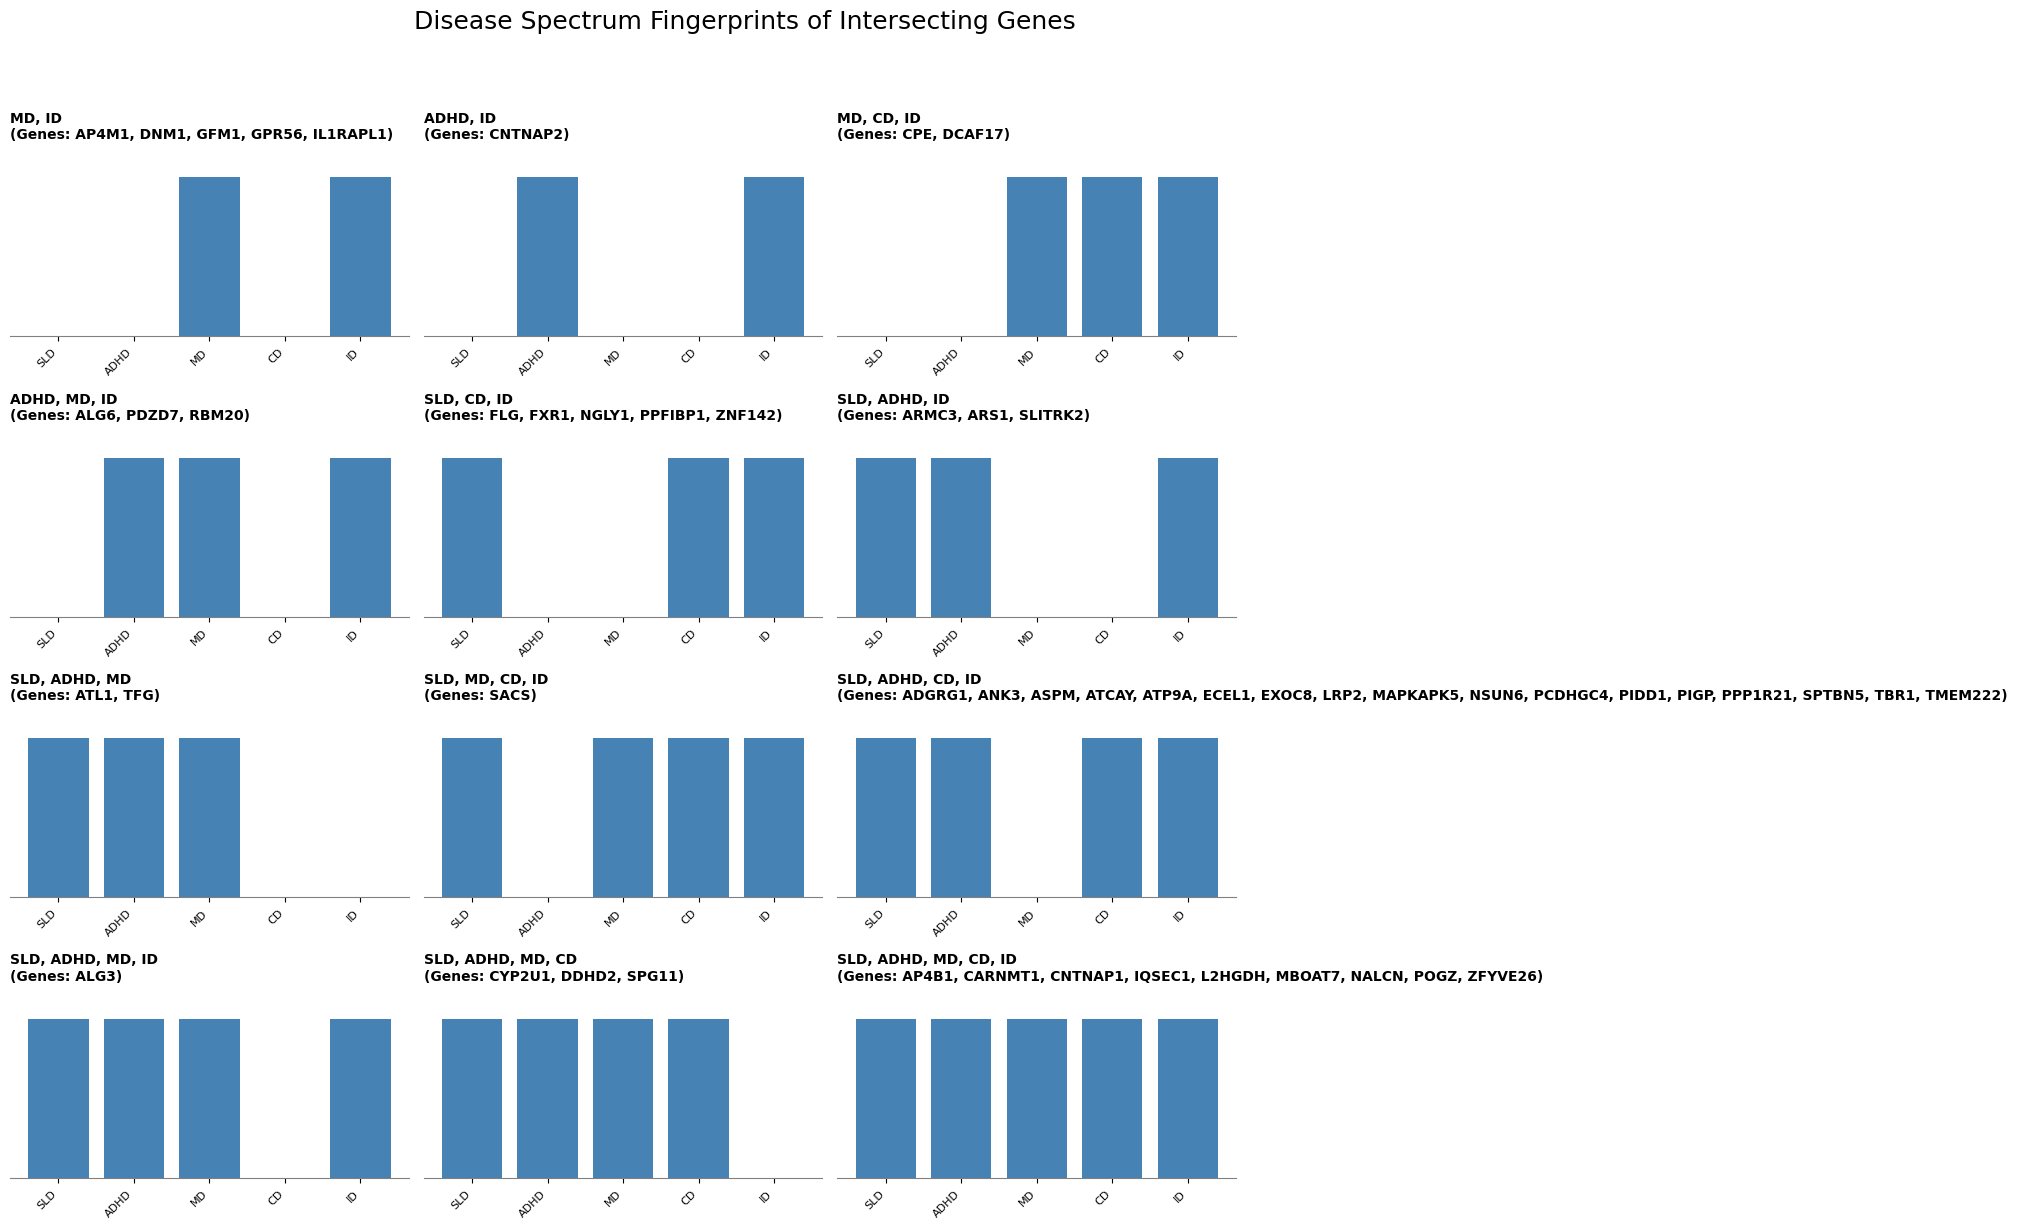


--- Disease Spectrum Fingerprint Plot (Intersecting Genes Only) Generated ---
This plot now focuses exclusively on genes that are shared between 2 or more disorders,
making the figure much clearer and highlighting the key intersections.
- Each mini-plot represents a unique **shared association profile**.
- The title identifies the **disorders** involved in that profile.
- The **list of genes** below the title are the ones sharing that specific intersection.
- **Blue bars** indicate presence, **grey bars** indicate absence.
This allows for a more focused and interpretable view of shared genetic associations.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# 2. Define your gene lists as Python sets (from previous scripts)
SLD = {
    'TFG', 'ATL1', 'CYP2U1', 'SPG11', 'ZFYVE26', 'DDHD2', 'AP4B1', 'CNTNAP1',
    'ALG3', 'IQSEC1', 'CARNMT1', 'POGZ', 'L2HGDH', 'NALCN', 'ECEL1', 'TBR1',
    'PIGP', 'LRP2', 'TMEM222', 'PIDD1', 'ARMC3', 'SPTBN5', 'ATCAY', 'ADGRG1',
    'ARS1', 'ZNF142', 'ASPM', 'ATP9A', 'MAPKAPK5', 'NSUN6', 'SLITRK2',
    'PPP1R21', 'EXOC8', 'PCDHGC4', 'ANK3', 'NGLY1', 'FLG', 'PPFIBP1', 'MBOAT7',
    'FXR1', 'SACS'
}

ADHD = {
    'PDZD7', 'ALG6', 'RBM20', 'CNTNAP2', 'MBOAT7', 'TFG', 'ATL1', 'CYP2U1',
    'SPG11', 'ZFYVE26', 'DDHD2', 'AP4B1', 'CNTNAP1', 'ALG3', 'IQSEC1',
    'CARNMT1', 'POGZ', 'L2HGDH', 'NALCN', 'ECEL1', 'TBR1', 'PIGP', 'LRP2',
    'TMEM222', 'PIDD1', 'ARMC3', 'SPTBN5', 'ATCAY', 'ADGRG1', 'ARS1', 'ASPM',
    'ATP9A', 'MAPKAPK5', 'NSUN6', 'SLITRK2', 'PPP1R21', 'EXOC8', 'PCDHGC4',
    'ANK3'
}

MD = {
    'CPE', 'GPR56', 'GFM1', 'AP4M1', 'GRIN2A', 'IL1RAPL1', 'NCDN', 'GJB1',
    'MPV17', 'PRX', 'NEMF', 'DNM1', 'PDZD7', 'ALG6', 'RBM20', 'MBOAT7',
    'SACS', 'HEXB', 'BICD2', 'ZFYVE26', 'ALS2', 'TFG', 'ATL1', 'CYP2U1',
    'SPG11', 'DDHD2', 'AP4B1', 'DCAF17', 'CNTNAP1', 'ALG3', 'IQSEC1',
    'CARNMT1', 'POGZ', 'L2HGDH', 'NALCN', 'CC2D2A', 'TG', 'MPLKIP', 'GRIN2A',
    'NRG3', 'RGS3', 'NCDN', 'BCKDK', 'GARNL3', 'PNKP', 'TTI2', 'TRMT1',
    'MYO1E', 'RBBP8', 'PSMB1', 'PDE2A'
}

CD = {
    'CPE', 'TFGA', 'TL1', 'CYP2U1', 'SPG11', 'DDHD2', 'AP4B1', 'DCAF17',
    'CNTNAP1', 'IQSEC1', 'CARNMT1', 'POGZ', 'L2HGDH', 'NALCN', 'ECEL1', 'TBR1',
    'PIGP', 'LRP2', 'TMEM222', 'PIDD1', 'ZFYVE26', 'SPTBN5', 'ATCAY',
    'ADGRG1', 'ZNF142', 'ASPM', 'ATP9A', 'MAPKAPK5', 'NSUN6', 'PPP1R21',
    'EXOC8', 'PCDHGC4', 'ANK3', 'NGLY1', 'FLG', 'PPFIBP1', 'MBOAT7', 'FXR1',
    'SACS', 'AP4S1'
}

ID = {
    'ITGB6', 'AHSG', 'GAN', 'TPO', 'SOX4', 'MLYCD', 'PPP1R1B', 'TUSC3',
    'MAN1B1', 'NSUN2', 'FBXO31', 'HHAT', 'ZNF589', 'KMT2B', 'AIMP1', 'TSPYL2',
    'LMAN2L', 'KALRN', 'ZFYVE26', 'MKKS', 'FRAS1', 'GNE', 'PGAP1', 'FRY',
    'TSHR', 'TMEM67', 'DOCK8', 'FLNA', 'MED23', 'ARL13B', 'ASPA', 'POMT2',
    'SYNE1', 'ZNF41', 'WDR73', 'KCNA2', 'VPS13B', 'SRD5A3', 'MAN2B1', 'WDR62',
    'AFF3', 'TBC1D23', 'SUMF2', 'UBA7', 'SLAIN1', 'LAMC1', 'VPS35', 'GPR64S',
    'YNRG', 'BDNF', 'TET1', 'TMEM135', 'IMPA1', 'NAGS', 'GPT2', 'DCPS',
    'MAGEA11', 'MECP2', 'CRADD', 'TRAPPC10', 'CACNG7', 'GRAMD1B', 'TET3',
    'SPTBN2', 'TBRG1', 'EI24', 'FBXL3', 'VPS53', 'MLC1', 'GLB1', 'NDST1',
    'METTL23', 'DCC', 'COL18A1', 'TRAPPC9', 'GRM1', 'ROS1', 'CCS', 'IL1RAPL1',
    'ARX', 'C5orf42', 'ELFN1', 'METTL4', 'FKRP', 'HIRA', 'BDH1', 'TRAPPC6B',
    'ALKBH8', 'MBOAT7', 'ANK3', 'CREBBP', 'TANGO2', 'TARS2', 'ANAPC2',
    'SLC50A1', 'TBC1D3', 'MN1', 'HCFC1', 'AP4M1', 'SLC7A10', 'CCDC82',
    'APTX', 'CAPN12', 'UBE2J2', 'PRKAR2B', 'TOP3B', 'DPH1', 'PHACTR1', 'AACS',
    'DNAJC', '2TBC1D8', 'DCTN2', 'MSS51', 'CPT1B', 'ESYT3', 'LRRC6', 'FGFR1',
    'EXOSC8', 'SEPTIN6', 'CCT6B', 'AREL1', 'FNIP2', 'DUOX1', 'RGR', 'O',
    'R2A12', 'DGCR8', 'STX19', 'ZSCAN25', 'FMOD', 'VAPA', 'GPAA1', 'SCN1A',
    'GSTCD', 'WFDC1', 'TM2D3', 'MEGF9', 'C22orf31', 'GGN', 'SMARCA1', 'LINGO1',
    'SLC45A4', 'ASPM', 'MDGA2', 'PUS7', 'LRP2', 'CPE', 'USP44', 'CWF19L1',
    'GEMIN5', 'ALG3', 'IQSEC1', 'CARNMT1', 'GPR56', 'METTL5', 'GFM1', 'SACS',
    'TMEM222', 'DNM1', 'SPTBN5', 'PDZD7', 'ALG6', 'RBM20', 'CNTNAP2', 'CARS2',
    'ARSA', 'CNTN2', 'CLCN4', 'AP1G1', 'CYB5R3', 'LAMA3', 'ABCC9', 'DCAF17',
    'CNTNAP1', 'POGZ', 'L2HGDH', 'NALCN', 'ECEL1', 'TBR1', 'PIGP', 'PIDD1',
    'ARMC3', 'ATCAY', 'ADGRG1', 'ARS1', 'ZNF142', 'AP4B1', 'ATP9A',
    'MAPKAPK5', 'NSUN6', 'SLITRK2', 'PPP1R21', 'EXOC8', 'PCDHGC4', 'NGLY1',
    'FLG', 'PPFIBP1', 'FXR1', 'PIGG'
}

# Dictionary of all disorder gene sets
all_disorder_genes_dict = {
    'SLD': SLD,
    'ADHD': ADHD,
    'MD': MD,
    'CD': CD,
    'ID': ID,
}

disorder_names = list(all_disorder_genes_dict.keys())

# 1. Get all unique genes
all_unique_genes = sorted(list(set.union(*all_disorder_genes_dict.values())))

# 2. Create fingerprint for each gene AND FILTER for intersecting genes
fingerprint_groups = defaultdict(list)
intersecting_genes_count = 0

for gene in all_unique_genes:
    fingerprint = tuple([1 if gene in all_disorder_genes_dict[disorder] else 0 for disorder in disorder_names])

    # NEW FILTERING STEP: Only include genes present in 2 or more disorders
    if sum(fingerprint) >= 2:
        fingerprint_groups[fingerprint].append(gene)
        intersecting_genes_count += 1

# Check if there are any intersecting genes to plot
if intersecting_genes_count == 0:
    print("No genes found that intersect between 2 or more disorders. No plot will be generated.")
    exit() # Exit the script if no intersecting genes

# Sort fingerprints for consistent plotting order (e.g., by number of disorders involved)
sorted_fingerprints = sorted(fingerprint_groups.keys(), key=lambda x: (sum(x), x)) # Sort by sum (num disorders) then lexicographically

# --- Plotting the Disease Spectrum Fingerprint ---

# Determine number of rows and columns for the plot grid
num_fingerprint_types = len(sorted_fingerprints)
ncols = 3 # Number of fingerprint columns in the main plot
nrows = (num_fingerprint_types + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 3 * nrows), squeeze=False)
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Colors for the bars (present vs. absent)
present_color = 'steelblue'
absent_color = 'lightgrey'

# Loop through each unique fingerprint type and plot
for i, fingerprint in enumerate(sorted_fingerprints):
    if i >= len(axes): # Safety break if more fingerprints than subplots
        break
    ax = axes[i]

    # Create the small bar chart (fingerprint)
    x = np.arange(len(disorder_names))
    heights = np.array(fingerprint) # 1 for present, 0 for absent

    bars = ax.bar(x, heights, color=[present_color if h == 1 else absent_color for h in heights], width=0.8)

    # Set x-ticks and labels for disorders
    ax.set_xticks(x)
    ax.set_xticklabels(disorder_names, rotation=45, ha='right', fontsize=8)

    ax.set_yticks([]) # No y-axis ticks
    ax.set_ylim(0, 1.2) # Fixed y-limit for binary bars
    ax.set_yticklabels([])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('gray') # A subtle bottom line

    # Create a human-readable pattern string (e.g., "SLD, ADHD")
    pattern_disorders = [disorder_names[j] for j, val in enumerate(fingerprint) if val == 1]
    if not pattern_disorders: # This case should be rare after filtering, but for robustness
        pattern_str = "No Associated Disorders"
    else:
        pattern_str = ", ".join(pattern_disorders)

    # Title for the subgroup (the pattern)
    genes_in_group = sorted(fingerprint_groups[fingerprint])
    title = f"{pattern_str}\n(Genes: {', '.join(genes_in_group)})"
    ax.set_title(title, fontsize=10, pad=5, loc='left', weight='bold')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Disease Spectrum Fingerprints of Intersecting Genes", fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap

# --- Save the figure ---
plt.savefig('disease_spectrum_fingerprints_intersecting_genes_600dpi.png', dpi=600, bbox_inches='tight')

plt.show()

print("\n--- Disease Spectrum Fingerprint Plot (Intersecting Genes Only) Generated ---")
print("This plot now focuses exclusively on genes that are shared between 2 or more disorders,")
print("making the figure much clearer and highlighting the key intersections.")
print("- Each mini-plot represents a unique **shared association profile**.")
print("- The title identifies the **disorders** involved in that profile.")
print("- The **list of genes** below the title are the ones sharing that specific intersection.")
print("- **Blue bars** indicate presence, **grey bars** indicate absence.")
print("This allows for a more focused and interpretable view of shared genetic associations.")

AttributeError: 'Figure' object has no attribute 'get_xticklabels'

<Figure size 600x5750 with 0 Axes>

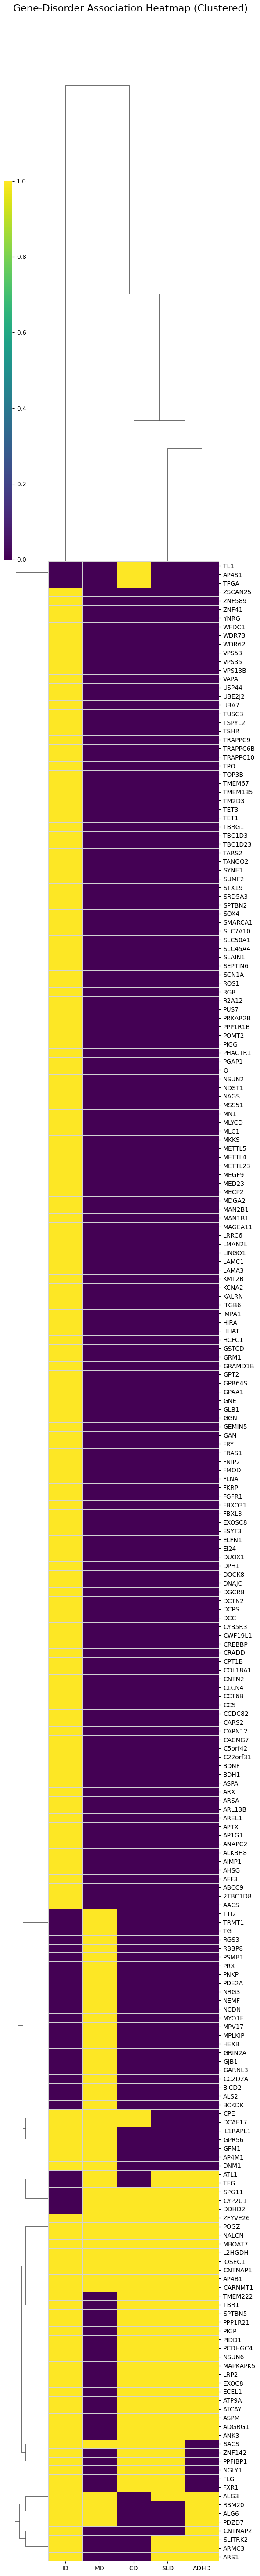

In [5]:
# 1. Import necessary libraries
from upsetplot import from_contents # Not strictly needed for this plot, but keeps context
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns # Import seaborn for heatmaps and clustermaps

# 2. Define your gene lists as Python sets (from previous script)
SLD = {
    'TFG', 'ATL1', 'CYP2U1', 'SPG11', 'ZFYVE26', 'DDHD2', 'AP4B1', 'CNTNAP1',
    'ALG3', 'IQSEC1', 'CARNMT1', 'POGZ', 'L2HGDH', 'NALCN', 'ECEL1', 'TBR1',
    'PIGP', 'LRP2', 'TMEM222', 'PIDD1', 'ARMC3', 'SPTBN5', 'ATCAY', 'ADGRG1',
    'ARS1', 'ZNF142', 'ASPM', 'ATP9A', 'MAPKAPK5', 'NSUN6', 'SLITRK2',
    'PPP1R21', 'EXOC8', 'PCDHGC4', 'ANK3', 'NGLY1', 'FLG', 'PPFIBP1', 'MBOAT7',
    'FXR1', 'SACS'
}

ADHD = {
    'PDZD7', 'ALG6', 'RBM20', 'CNTNAP2', 'MBOAT7', 'TFG', 'ATL1', 'CYP2U1',
    'SPG11', 'ZFYVE26', 'DDHD2', 'AP4B1', 'CNTNAP1', 'ALG3', 'IQSEC1',
    'CARNMT1', 'POGZ', 'L2HGDH', 'NALCN', 'ECEL1', 'TBR1', 'PIGP', 'LRP2',
    'TMEM222', 'PIDD1', 'ARMC3', 'SPTBN5', 'ATCAY', 'ADGRG1', 'ARS1', 'ASPM',
    'ATP9A', 'MAPKAPK5', 'NSUN6', 'SLITRK2', 'PPP1R21', 'EXOC8', 'PCDHGC4',
    'ANK3'
}

MD = {
    'CPE', 'GPR56', 'GFM1', 'AP4M1', 'GRIN2A', 'IL1RAPL1', 'NCDN', 'GJB1',
    'MPV17', 'PRX', 'NEMF', 'DNM1', 'PDZD7', 'ALG6', 'RBM20', 'MBOAT7',
    'SACS', 'HEXB', 'BICD2', 'ZFYVE26', 'ALS2', 'TFG', 'ATL1', 'CYP2U1',
    'SPG11', 'DDHD2', 'AP4B1', 'DCAF17', 'CNTNAP1', 'ALG3', 'IQSEC1',
    'CARNMT1', 'POGZ', 'L2HGDH', 'NALCN', 'CC2D2A', 'TG', 'MPLKIP', 'GRIN2A',
    'NRG3', 'RGS3', 'NCDN', 'BCKDK', 'GARNL3', 'PNKP', 'TTI2', 'TRMT1',
    'MYO1E', 'RBBP8', 'PSMB1', 'PDE2A'
}

CD = {
    'CPE', 'TFGA', 'TL1', 'CYP2U1', 'SPG11', 'DDHD2', 'AP4B1', 'DCAF17',
    'CNTNAP1', 'IQSEC1', 'CARNMT1', 'POGZ', 'L2HGDH', 'NALCN', 'ECEL1', 'TBR1',
    'PIGP', 'LRP2', 'TMEM222', 'PIDD1', 'ZFYVE26', 'SPTBN5', 'ATCAY',
    'ADGRG1', 'ZNF142', 'ASPM', 'ATP9A', 'MAPKAPK5', 'NSUN6', 'PPP1R21',
    'EXOC8', 'PCDHGC4', 'ANK3', 'NGLY1', 'FLG', 'PPFIBP1', 'MBOAT7', 'FXR1',
    'SACS', 'AP4S1'
}

ID = {
    'ITGB6', 'AHSG', 'GAN', 'TPO', 'SOX4', 'MLYCD', 'PPP1R1B', 'TUSC3',
    'MAN1B1', 'NSUN2', 'FBXO31', 'HHAT', 'ZNF589', 'KMT2B', 'AIMP1', 'TSPYL2',
    'LMAN2L', 'KALRN', 'ZFYVE26', 'MKKS', 'FRAS1', 'GNE', 'PGAP1', 'FRY',
    'TSHR', 'TMEM67', 'DOCK8', 'FLNA', 'MED23', 'ARL13B', 'ASPA', 'POMT2',
    'SYNE1', 'ZNF41', 'WDR73', 'KCNA2', 'VPS13B', 'SRD5A3', 'MAN2B1', 'WDR62',
    'AFF3', 'TBC1D23', 'SUMF2', 'UBA7', 'SLAIN1', 'LAMC1', 'VPS35', 'GPR64S',
    'YNRG', 'BDNF', 'TET1', 'TMEM135', 'IMPA1', 'NAGS', 'GPT2', 'DCPS',
    'MAGEA11', 'MECP2', 'CRADD', 'TRAPPC10', 'CACNG7', 'GRAMD1B', 'TET3',
    'SPTBN2', 'TBRG1', 'EI24', 'FBXL3', 'VPS53', 'MLC1', 'GLB1', 'NDST1',
    'METTL23', 'DCC', 'COL18A1', 'TRAPPC9', 'GRM1', 'ROS1', 'CCS', 'IL1RAPL1',
    'ARX', 'C5orf42', 'ELFN1', 'METTL4', 'FKRP', 'HIRA', 'BDH1', 'TRAPPC6B',
    'ALKBH8', 'MBOAT7', 'ANK3', 'CREBBP', 'TANGO2', 'TARS2', 'ANAPC2',
    'SLC50A1', 'TBC1D3', 'MN1', 'HCFC1', 'AP4M1', 'SLC7A10', 'CCDC82',
    'APTX', 'CAPN12', 'UBE2J2', 'PRKAR2B', 'TOP3B', 'DPH1', 'PHACTR1', 'AACS',
    'DNAJC', '2TBC1D8', 'DCTN2', 'MSS51', 'CPT1B', 'ESYT3', 'LRRC6', 'FGFR1',
    'EXOSC8', 'SEPTIN6', 'CCT6B', 'AREL1', 'FNIP2', 'DUOX1', 'RGR', 'O',
    'R2A12', 'DGCR8', 'STX19', 'ZSCAN25', 'FMOD', 'VAPA', 'GPAA1', 'SCN1A',
    'GSTCD', 'WFDC1', 'TM2D3', 'MEGF9', 'C22orf31', 'GGN', 'SMARCA1', 'LINGO1',
    'SLC45A4', 'ASPM', 'MDGA2', 'PUS7', 'LRP2', 'CPE', 'USP44', 'CWF19L1',
    'GEMIN5', 'ALG3', 'IQSEC1', 'CARNMT1', 'GPR56', 'METTL5', 'GFM1', 'SACS',
    'TMEM222', 'DNM1', 'SPTBN5', 'PDZD7', 'ALG6', 'RBM20', 'CNTNAP2', 'CARS2',
    'ARSA', 'CNTN2', 'CLCN4', 'AP1G1', 'CYB5R3', 'LAMA3', 'ABCC9', 'DCAF17',
    'CNTNAP1', 'POGZ', 'L2HGDH', 'NALCN', 'ECEL1', 'TBR1', 'PIGP', 'PIDD1',
    'ARMC3', 'ATCAY', 'ADGRG1', 'ARS1', 'ZNF142', 'AP4B1', 'ATP9A',
    'MAPKAPK5', 'NSUN6', 'SLITRK2', 'PPP1R21', 'EXOC8', 'PCDHGC4', 'NGLY1',
    'FLG', 'PPFIBP1', 'FXR1', 'PIGG'
}

# Create a dictionary of your sets
all_disorder_genes_dict = {
    'SLD': SLD,
    'ADHD': ADHD,
    'MD': MD,
    'CD': CD,
    'ID': ID,
}

# 3. Create a comprehensive list of all unique genes
all_unique_genes = set()
for gene_set in all_disorder_genes_dict.values():
    all_unique_genes.update(gene_set)
sorted_unique_genes = sorted(list(all_unique_genes))

# 4. Create the binary (presence/absence) DataFrame
data_matrix = []
for gene in sorted_unique_genes:
    row = [1 if gene in all_disorder_genes_dict[disorder] else 0 for disorder in all_disorder_genes_dict.keys()]
    data_matrix.append(row)

df_association = pd.DataFrame(data_matrix, index=sorted_unique_genes, columns=all_disorder_genes_dict.keys())

# 5. Generate the Clustermap (Association Plot)
# Adjust figure size dynamically based on the number of genes
num_genes = len(sorted_unique_genes)
num_disorders = len(all_disorder_genes_dict)

# Heuristics for figure size:
# Height: More genes need more vertical space. Approximately 0.2-0.3 per gene.
# Width: More disorders need more horizontal space. Approximately 0.8-1.0 per disorder.
figsize_height = max(8, num_genes * 0.25) # Minimum height of 8, scales up
figsize_width = max(6, num_disorders * 0.9) # Minimum width of 6, scales up

plt.figure(figsize=(figsize_width, figsize_height))

# Create the clustermap
# cmap='viridis' is a good sequential colormap; 'Greys' or 'Blues' also work well for binary data.
# linewidths adds lines between cells for clarity.
# annot=False because we don't need the 0/1 values printed on top.
sns.clustermap(df_association,
               cmap='viridis',
               cbar_pos=(0.02, 0.8, 0.03, 0.15), # Position the color bar
               linewidths=.5,
               linecolor='lightgrey',
               figsize=(figsize_width, figsize_height), # Pass figsize directly to clustermap
               col_cluster=True, # Cluster columns (disorders)
               row_cluster=True, # Cluster rows (genes)
               yticklabels=True, # Show gene labels on y-axis
               xticklabels=True # Show disorder labels on x-axis
              )

plt.suptitle("Gene-Disorder Association Heatmap (Clustered)", y=1.02, fontsize=16) # Main title above the plot

# Adjust font sizes for tick labels if they become too small/large
plt.setp(plt.gcf().get_xticklabels(), fontsize=10) # Adjust x-tick label font size
plt.setp(plt.gcf().get_yticklabels(), fontsize=8)  # Adjust y-tick label font size

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap

# --- Save the figure ---
plt.savefig('gene_disorder_association_clustermap_600dpi.png', dpi=600, bbox_inches='tight')

plt.show()

print("\n--- Gene-Disorder Association Clustermap Generated ---")
print("This plot shows the presence (colored cell) or absence (uncolored/different color cell) of each gene")
print("in each of the five disorders. Genes and disorders are clustered based on their similarity.")
print("The dendrograms on the left and top indicate the clustering relationships.")

/usr/local/lib/python3.11/dist-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/usr/local/lib/python3.11/dist-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/usr/local/lib/

<Figure size 2500x1200 with 0 Axes>

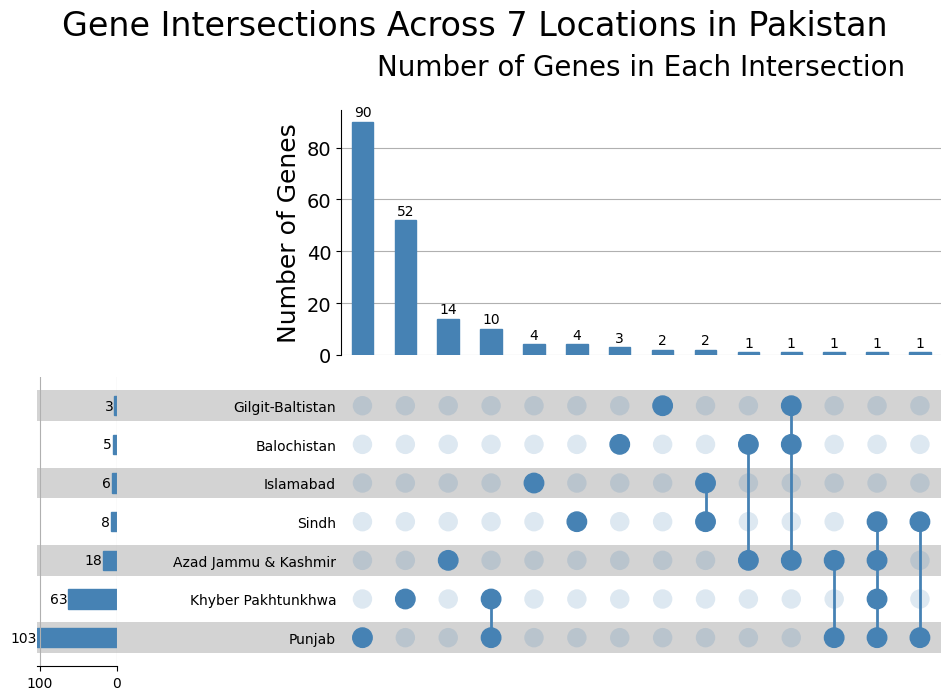

In [ ]:
# 2. Import necessary libraries
from upsetplot import plot, from_contents
import pandas as pd
from matplotlib import pyplot as plt
# seaborn is still useful for other plotting if you add it, but not for set_colors in this specific case
# import seaborn as sns

# 3. Define your gene lists as Python sets (as previously extracted)
azad_jammu_kashmir = {
    'CREBBP', 'DDX5', 'ELF1', 'ETV6', 'FLI1', 'GRB2', 'GZMB', 'ORC1L',
    'ORC4', 'PRKAR1B', 'PRKAR2B', 'PTCH1', 'RNF130', 'SAA1', 'TRID1C2',
    'TRID2C9', 'UCN3', 'WDR62'
}

balochistan = {
    'CREBBP', 'ELF1', 'ESR1', 'PTPN11', 'TRITRC2'
}

gilgit_baltistan = {
    'ELF1', 'EP300', 'ITGB6'
}

islamabad = {
    'ATM', 'BRCA1', 'FAM162A', 'HSD17B10', 'LRP1', 'NGLY1'
}

khyber_pakhtunkhwa = {
    'ALGA', 'ARL4C', 'APC', 'ANAPC2', 'ANAPC4', 'APN2', 'APM', 'BICD2',
    'BRMS1', 'CCDC2A', 'CCDC2D4', 'CCNT1', 'CNTN2', 'CNTNAP1', 'CNTNAP2',
    'CYP17A1', 'CYP2U1', 'DCUN1D7', 'DDRGK1', 'DYNC1I2', 'FLT3', 'FAS',
    'FAM12', 'FAM129C', 'GFM1', 'GNB1', 'HCKX1', 'HERC1', 'IGSF1', 'IMR1',
    'PHGDH', 'PFN1', 'PMPCA', 'LMAN2L', 'LRRC2B', 'METTL23', 'MYO6',
    'MPV17', 'NBN', 'PTPN12', 'PDZ2', 'PKMYT1', 'PPP1R1B', 'PRKAA1',
    'PSM1', 'PSMD20', 'RAE1', 'SACS', 'SLC25A1', 'SPATA2', 'SPTBN5',
    'SUMO1', 'TBC1D3', 'TRIDC2C9', 'WDR62', 'WDR26', 'ZNF589',
    'ZNF589B', 'ZNF292', 'ZNF81', 'WDR90', 'WDR92', 'ZNF292', 'ZNF31'
}

punjab = {
    'ADA', 'A1G1', 'AP4M1', 'APP', 'ATP5A1', 'ARAP1', 'ARAP2',
    'ARSA', 'ARSB', 'ATXN1', 'BAQALNT1', 'BAX', 'BAP31', 'BUB1', 'C22A',
    'CASK', 'CCDC82', 'CCND2', 'CCTB8', 'CDH1', 'CEP135', 'CIDEB',
    'COL18A1', 'CORT', 'DDHD2', 'DDRGK1', 'DCX', 'DPH1', 'EIF3E',
    'EXOSC8', 'FAS', 'FBXO11', 'FRB1', 'FRK8', 'GADD4', 'GBA', 'FRS1',
    'GATA6', 'GCN', 'GPKSA', 'GPRA1', 'GPR34', 'GRM1', 'GZMB', 'HBA',
    'HIRA', 'HTAP1L', 'ITPR1', 'KCNJ1', 'LAMB3', 'LRRC2B', 'LRRC3',
    'LRP1B1', 'MADR93', 'MCOLN1', 'MECP2', 'MEG19', 'METTL23', 'METTL4',
    'MLH1', 'MSS51', 'MSRGE', 'NBN', 'NOP2', 'OGT', 'PDE4', 'PFN4',
    'PUS7', 'PTPN50', 'RGR', 'RPL3', 'RYK', 'SACS', 'SERPINA10',
    'SEPTIN6', 'SIP1', 'SLC2A2', 'SLC43A2', 'SLC7A10', 'SMARCC1', 'SPG1',
    'SPG11', 'TBC1D8', 'TFG', 'TIM22', 'TMM27', 'TMEM222', 'TMEM67', 'TPM1',
    'TR', 'TRANK1', 'TRID1C2B', 'TRITC9', 'TRD2C9', 'USP44', 'USP46',
    'WDR62', 'WDR90', 'ZCCHC5', 'CEP155', 'ZNF292', 'WDR90', 'WDR92', 'ZNF292',
    'ZNF31'
}

sindh = {
    'ATM', 'BUB1', 'HICPH1', 'LRP1', 'NFE4', 'NFE5', 'TUSC3', 'WDR62'
}

# Create a dictionary of your sets, mapping location names to gene sets
all_locations_genes = {
    'Azad Jammu & Kashmir': azad_jammu_kashmir,
    'Balochistan': balochistan,
    'Gilgit-Baltistan': gilgit_baltistan,
    'Islamabad': islamabad,
    'Khyber Pakhtunkhwa': khyber_pakhtunkhwa,
    'Punjab': punjab,
    'Sindh': sindh,
}

# 4. Generate data for UpSet plot
upset_data = from_contents(all_locations_genes)

# 5. Define a color palette for your locations (will not be used in plot() but can be for other visuals)
# palette = sns.color_palette("tab10", n_colors=len(all_locations_genes))
# set_colors = {name: color for name, color in zip(all_locations_genes.keys(), palette)}

# ... (your existing code for defining all_locations_genes and upset_data) ...

# ... (your existing code for defining all_locations_genes, upset_data, and plotting) ...

# ... (your existing code for defining all_locations_genes, upset_data) ...

# 6. Generate the UpSet plot with customizations
# Increased figure width significantly for better spacing
plt.figure(figsize=(25, 12)) # <-- INCREASED FIGURE SIZE

plot(upset_data,
     show_counts=True,
     sort_by='cardinality',
     element_size=40,
     facecolor='steelblue',
     shading_color='lightgrey',
    )

# Adjust font sizes for titles and labels if they still overlap
plt.suptitle("Gene Intersections Across 7 Locations in Pakistan", fontsize=24, y=1.02) # Slightly larger title
plt.title("Number of Genes in Each Intersection", fontsize=20, pad=25) # Slightly larger subtitle
plt.xlabel("Intersection Size", fontsize=18) # Slightly larger x-axis label
plt.ylabel("Number of Genes", fontsize=18) # Slightly larger y-axis label

plt.xticks(fontsize=14) # Slightly larger x-tick labels
plt.yticks(fontsize=14) # Slightly larger y-tick labels

# You might need to further adjust specific text elements if they still overlap.
# For example, to adjust the set labels (location names on the left):
# You can try to make them smaller if they are overlapping:
# plt.gca().axes[0].tick_params(axis='y', labelsize=12) # For the left bar chart labels
# For the intersection count labels (numbers above the top bars), UpSetPlot handles them,
# but if they overlap, a smaller font for show_counts might be needed (not directly exposed in plot() args)
# or you might need to make the figure even wider.

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title/label overlap

# --- Save the figure (uncomment to save) ---
# plt.savefig('gene_intersections_upset_plot_600dpi.png', dpi=600, bbox_inches='tight')

plt.show() # Display the plot

/usr/local/lib/python3.11/dist-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/usr/local/lib/python3.11/dist-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/usr/local/lib/

<Figure size 2800x1400 with 0 Axes>

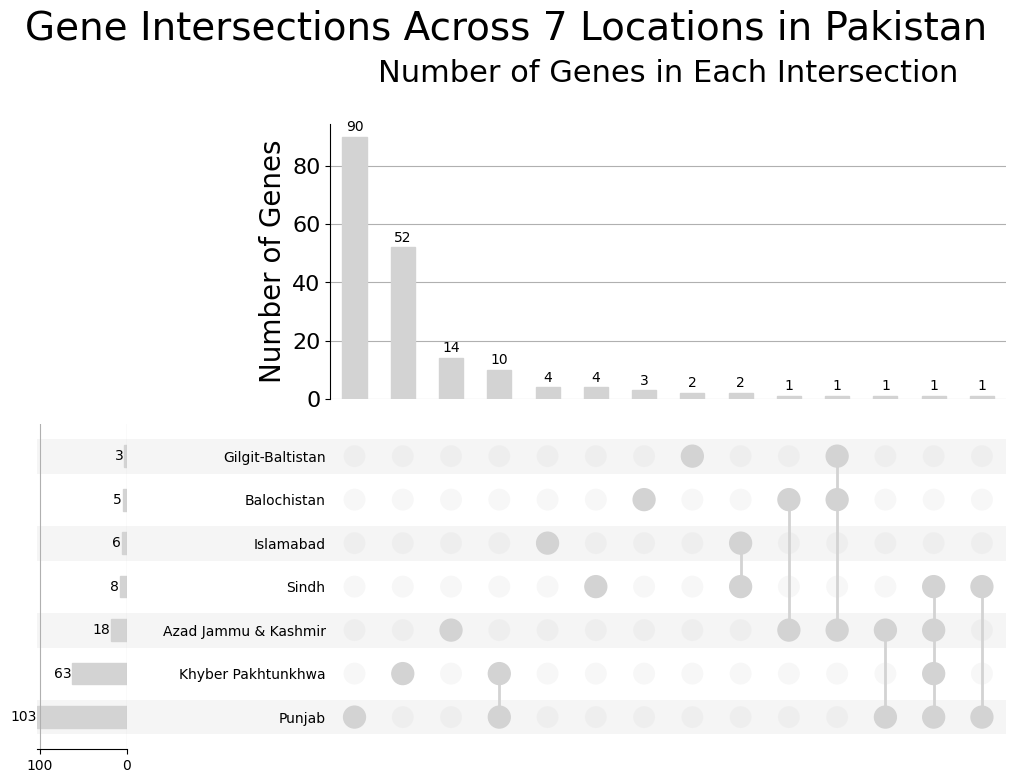

In [ ]:
# 2. Import necessary libraries
from upsetplot import plot, from_contents
import pandas as pd
from matplotlib import pyplot as plt
# seaborn is not strictly needed if set_colors and point_color are not supported
# import seaborn as sns

# 3. Define your gene lists as Python sets (as previously extracted)
azad_jammu_kashmir = {
    'CREBBP', 'DDX5', 'ELF1', 'ETV6', 'FLI1', 'GRB2', 'GZMB', 'ORC1L',
    'ORC4', 'PRKAR1B', 'PRKAR2B', 'PTCH1', 'RNF130', 'SAA1', 'TRID1C2',
    'TRID2C9', 'UCN3', 'WDR62'
}

balochistan = {
    'CREBBP', 'ELF1', 'ESR1', 'PTPN11', 'TRITRC2'
}

gilgit_baltistan = {
    'ELF1', 'EP300', 'ITGB6'
}

islamabad = {
    'ATM', 'BRCA1', 'FAM162A', 'HSD17B10', 'LRP1', 'NGLY1'
}

khyber_pakhtunkhwa = {
    'ALGA', 'ARL4C', 'APC', 'ANAPC2', 'ANAPC4', 'APN2', 'APM', 'BICD2',
    'BRMS1', 'CCDC2A', 'CCDC2D4', 'CCNT1', 'CNTN2', 'CNTNAP1', 'CNTNAP2',
    'CYP17A1', 'CYP2U1', 'DCUN1D7', 'DDRGK1', 'DYNC1I2', 'FLT3', 'FAS',
    'FAM12', 'FAM129C', 'GFM1', 'GNB1', 'HCKX1', 'HERC1', 'IGSF1', 'IMR1',
    'PHGDH', 'PFN1', 'PMPCA', 'LMAN2L', 'LRRC2B', 'METTL23', 'MYO6',
    'MPV17', 'NBN', 'PTPN12', 'PDZ2', 'PKMYT1', 'PPP1R1B', 'PRKAA1',
    'PSM1', 'PSMD20', 'RAE1', 'SACS', 'SLC25A1', 'SPATA2', 'SPTBN5',
    'SUMO1', 'TBC1D3', 'TRIDC2C9', 'WDR62', 'WDR26', 'ZNF589',
    'ZNF589B', 'ZNF292', 'ZNF81', 'WDR90', 'WDR92', 'ZNF292', 'ZNF31'
}

punjab = {
    'ADA', 'A1G1', 'AP4M1', 'APP', 'ATP5A1', 'ARAP1', 'ARAP2',
    'ARSA', 'ARSB', 'ATXN1', 'BAQALNT1', 'BAX', 'BAP31', 'BUB1', 'C22A',
    'CASK', 'CCDC82', 'CCND2', 'CCTB8', 'CDH1', 'CEP135', 'CIDEB',
    'COL18A1', 'CORT', 'DDHD2', 'DDRGK1', 'DCX', 'DPH1', 'EIF3E',
    'EXOSC8', 'FAS', 'FBXO11', 'FRB1', 'FRK8', 'GADD4', 'GBA', 'FRS1',
    'GATA6', 'GCN', 'GPKSA', 'GPRA1', 'GPR34', 'GRM1', 'GZMB', 'HBA',
    'HIRA', 'HTAP1L', 'ITPR1', 'KCNJ1', 'LAMB3', 'LRRC2B', 'LRRC3',
    'LRP1B1', 'MADR93', 'MCOLN1', 'MECP2', 'MEG19', 'METTL23', 'METTL4',
    'MLH1', 'MSS51', 'MSRGE', 'NBN', 'NOP2', 'OGT', 'PDE4', 'PFN4',
    'PUS7', 'PTPN50', 'RGR', 'RPL3', 'RYK', 'SACS', 'SERPINA10',
    'SEPTIN6', 'SIP1', 'SLC2A2', 'SLC43A2', 'SLC7A10', 'SMARCC1', 'SPG1',
    'SPG11', 'TBC1D8', 'TFG', 'TIM22', 'TMM27', 'TMEM222', 'TMEM67', 'TPM1',
    'TR', 'TRANK1', 'TRID1C2B', 'TRITC9', 'TRD2C9', 'USP44', 'USP46',
    'WDR62', 'WDR90', 'ZCCHC5', 'CEP155', 'ZNF292', 'WDR90', 'WDR92', 'ZNF292',
    'ZNF31'
}

sindh = {
    'ATM', 'BUB1', 'HICPH1', 'LRP1', 'NFE4', 'NFE5', 'TUSC3', 'WDR62'
}

# Create a dictionary of your sets, mapping location names to gene sets
all_locations_genes = {
    'Azad Jammu & Kashmir': azad_jammu_kashmir,
    'Balochistan': balochistan,
    'Gilgit-Baltistan': gilgit_baltistan,
    'Islamabad': islamabad,
    'Khyber Pakhtunkhwa': khyber_pakhtunkhwa,
    'Punjab': punjab,
    'Sindh': sindh,
}

# 4. Generate data for UpSet plot
upset_data = from_contents(all_locations_genes)

# 5. Generate the UpSet plot using only arguments that should be widely supported
plt.figure(figsize=(28, 14)) # Largest figure size for maximum space

plot(upset_data,
     show_counts=True,
     sort_by='cardinality',
     element_size=45, # Size of dots in the matrix
     # Removed: set_colors, point_color, query_semantics
     facecolor='lightgray', # A general background color for the intersection bars
     shading_color='whitesmoke', # Subtle alternating background for matrix rows
    )

# Adjust font sizes for maximum readability
plt.suptitle("Gene Intersections Across 7 Locations in Pakistan", fontsize=28, y=1.02)
plt.title("Number of Genes in Each Intersection", fontsize=22, pad=30)
plt.xlabel("Intersection Size", fontsize=20)
plt.ylabel("Number of Genes", fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout(rect=[0.02, 0.02, 0.98, 0.98]) # Increased padding around the entire plot

# --- Save the figure ---
plt.savefig('gene_intersections_upset_plot_final_600dpi.png', dpi=600, bbox_inches='tight')

plt.show()